In [33]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [79]:
x = list()
y = list()
v = list()
yaw = list()
yawd = list()

x_m = list()
y_m = list()

x_gt = list()
y_gt = list()
vx_gt = list()
vy_gt = list()

meas_type = list()
NIS_radar = list()
NIS_laser = list()

#with open('sample-laser-radar-measurement-data-1.txt') as f:
with open('results/data1_out.txt') as f:
    line = f.readline()
    line = f.readline()
    while line != "":
        row = line.split('\n')[0].split('\t')
        print(row)
        x.append(row[0])
        y.append(row[1])
        v.append(row[2])
        yaw.append(row[3])
        yawd.append(row[4])
        
        x_m.append(row[5])
        y_m.append(row[6])
        
        x_gt.append(row[7])
        y_gt.append(row[8])
        vx_gt.append(row[9])
        vy_gt.append(row[10])
        
        if (row[11] == 'R'):
            NIS_radar.append(row[12])
        elif (row[11] == 'L'):
            NIS_laser.append(row[12])
        
        line = f.readline()

['8.46292', '0.243462', '0', '0', '0', '8.46292', '0.243462', '8.6', '0.25', '-3.00029', '0', 'R', '6.95328e-310']
['8.44961', '0.250735', '-0.0127124', '0', '1.38778e-17', '8.44818', '0.251553', '8.45', '0.25', '-3.00027', '0', 'L', '0.00122847']
['8.47086', '0.248461', '-0.0128395', '4.88287e-05', '8.18226e-06', '8.56759', '0.241943', '8.45', '0.25', '0', '0', 'R', '0.125702']
['8.46417', '0.250708', '-0.0161417', '-4.31667e-05', '-8.19486e-06', '8.45582', '0.253997', '8.45', '0.25', '0', '0', 'L', '0.0062909']
['8.37327', '0.251082', '-1.12586', '0.000345474', '0.000326556', '8.42544', '0.254042', '8.35', '0.25', '-1.81979', '0', 'R', '15.2232']
['8.30981', '0.250517', '-1.15058', '0.00212611', '0.000850915', '8.23962', '0.24916', '8.25', '0.25', '-1.81978', '0', 'L', '0.340641']
['8.10324', '0.238935', '-1.48277', '0.107277', '0.0390547', '7.93286', '0.188391', '8.05', '0.2', '-3.99976', '-0.99994', 'R', '11.2294']
['8.00273', '0.205379', '-1.5504', '0.280902', '0.0934259', '7.8407

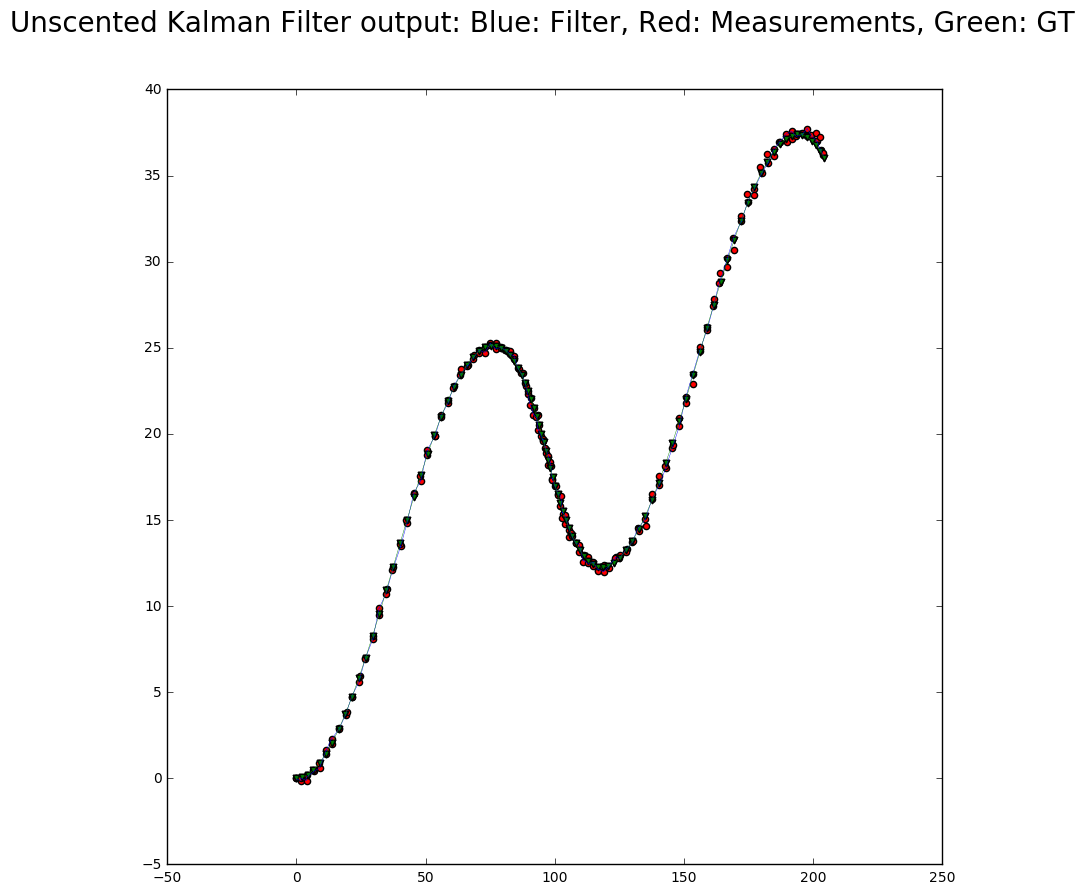

In [73]:
fig = plt.figure(figsize=(10,10))
fig.suptitle("Unscented Kalman Filter output: Blue: Filter, Red: Measurements, Green: GT",fontsize=20)
ax1 = plt.scatter(x,y,marker='.')
# plt.axis([4,8,-14,-10])
# plt.axis([50,100,20,28])
ax11 = plt.plot(x,y,linewidth=0.3)
ax2 = plt.scatter(x_m,y_m,c='r',marker='o')
ax3 = plt.scatter(x_gt,y_gt,c='g',marker='v')
ax33 = plt.plot(x_gt,y_gt,c='g',linewidth=0.3)
# plt.scatter(x,y)

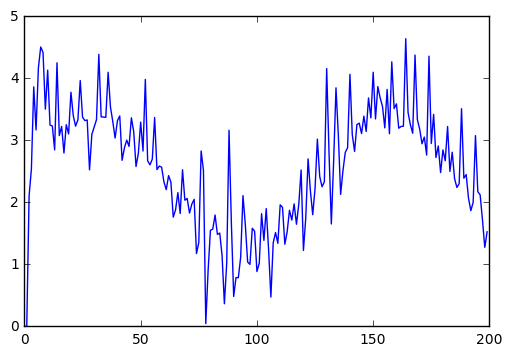

In [74]:
#plot velocity
plt.plot(v)

[0, 100, 0, 20]

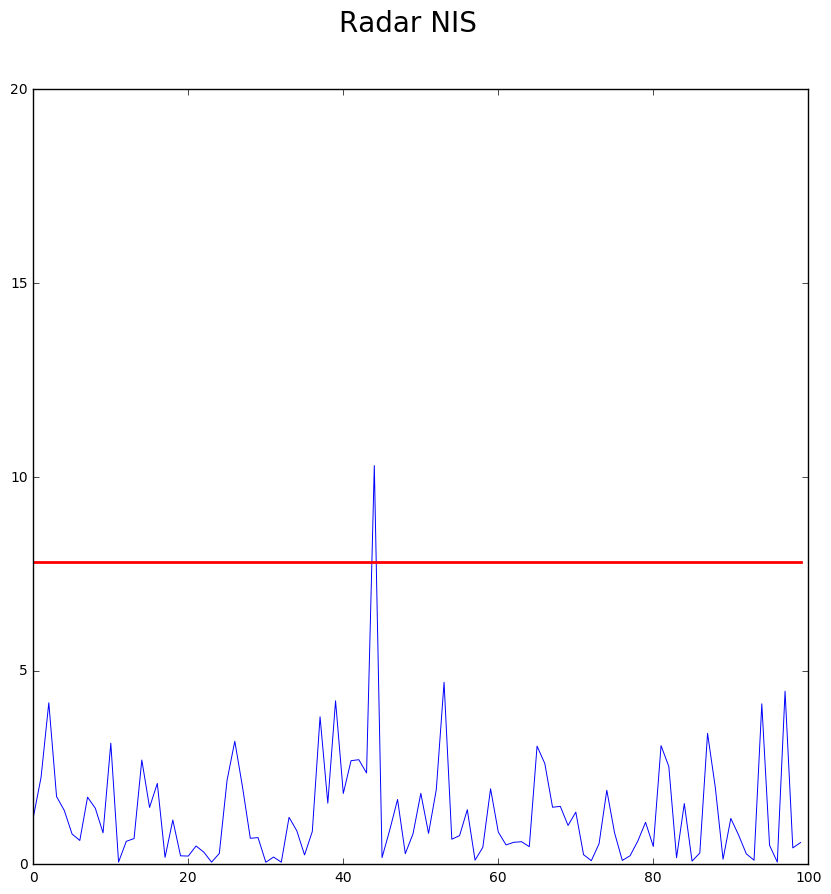

In [76]:
#Radar NIS
#From Chi Squared Dis with 3 DOF for Radar, NIS 95% < 7.815
NIS95_radar = np.ones(len(NIS_radar))*7.815

fig2 = plt.figure(figsize=(10,10))
fig2.suptitle("Radar NIS",fontsize=20)
ax1 = plt.plot(NIS_radar,linewidth=0.7)
ax2 = plt.plot(NIS95_radar,'r',linewidth=2)
# plt.axis([0,600,0,20])
plt.axis([0,100,0,20])

[0, 600, 0, 10]

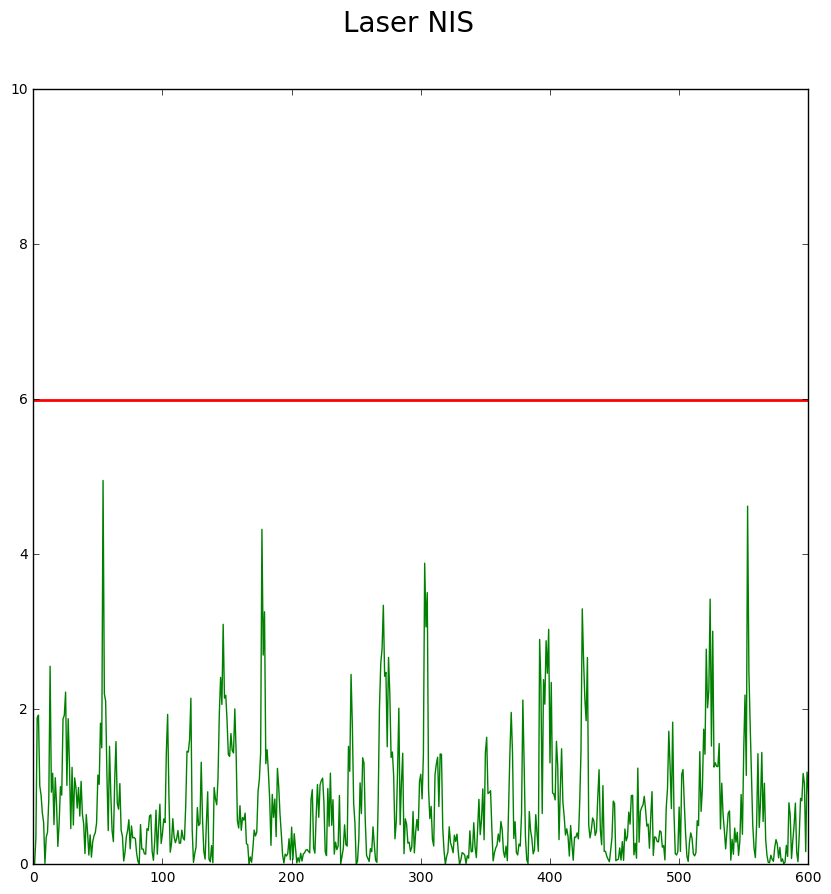

In [80]:
#Laser NIS

#From Chi Squared Dis with 2 DOF for Laser, NIS 95% < 5.991
NIS95_laser = np.ones(len(NIS_laser))*5.991

fig3 = plt.figure(figsize=(10,10))
fig3.suptitle("Laser NIS",fontsize=20)
ax1 = plt.plot(NIS_laser,'g',linewidth=1)
ax2 = plt.plot(NIS95_laser,'r',linewidth=2)
plt.axis([0,600,0,10])